# Data Exploration of Fragrance Dataset

## Import Libraries

In [4]:
!pip install openpyxl

   ---------------------------------------- 0.0/250.0 kB ? eta -:--:--
   - -------------------------------------- 10.2/250.0 kB ? eta -:--:--
   ------ -------------------------------- 41.0/250.0 kB 487.6 kB/s eta 0:00:01
   -------------- ------------------------ 92.2/250.0 kB 744.7 kB/s eta 0:00:01
   --------------------------- ------------ 174.1/250.0 kB 1.2 MB/s eta 0:00:01
   ---------------------------------------  245.8/250.0 kB 1.4 MB/s eta 0:00:01
   ---------------------------------------- 250.0/250.0 kB 1.0 MB/s eta 0:00:00


In [1]:
import pandas as pd
import numpy as np

## Open Data

In [27]:
df = pd.read_excel('perfume_database.xlsx', 
                   usecols=['brand', 'perfume', 'notes', 'longevity', 'sillage', 'gender', 'Age Group', 'Occasion', 'Season'])
df

,brand,perfume,notes,longevity,sillage,gender,Age Group,Occasion,Season
0,18 21 Man Made,Sweet Tobacco Spirits,"[""Citruses"", ""Saffron"", ""Tonka Bean"", ""Vanilla...","[4, 0, 9, 14, 31]","[10, 19, 28, 11]",unisex,Under 20,Formal,Fall
1,40 Notes Perfume,Cashmere Musk,"[""Sandalwood"", ""Cedar"", ""White Musk"", ""Cashmer...","[1, 0, 0, 1, 1]","[1, 3, 0, 2]",unisex,30-40,Formal,Fall
2,40 Notes Perfume,Exotic Ylang Ylang,"[""Ylang-Ylang"", ""Gardenia"", ""Musk""]","[1, 0, 0, 0, 2]","[0, 2, 1, 2]",unisex,Under 20,Formal,Fall
3,40 Notes Perfume,Exquisite Amber,"[""Labdanum"", ""Styrax"", ""Benzoin"", ""Vanilla"", ""...","[0, 0, 0, 0, 1]","[1, 0, 3, 1]",female,50+,Office,Winter
4,40 Notes Perfume,Oudwood Veil,"[""Kephalis"", ""Agarwood (Oud)""]","[1, 1, 1, 0, 6]","[1, 4, 0, 5]",unisex,20-30,Formal,Fall
...,...,...,...,...,...,...,...,...,...
37921,Urban Rituelle,Lemongrass Blend,"[""Lemongrass"", ""Myrtle"", ""Grapefruit"", ""Eucaly...","[0, 0, 0, 0, 0]","[0, 0, 0, 0]",male,20-30,Formal,Summer
37922,Urban Rituelle,Peach Blossom,"[""Peach"", ""Honey"", ""Sweet Pea"", ""Mimosa""]","[0, 0, 0, 0, 0]","[0, 0, 0, 0]",female,Under 20,Formal,Spring
37923,Urban Rituelle,Pomegranate,"[""Pomegranate"", ""Citruses"", ""Red Berries""]","[0, 0, 0, 0, 0]","[0, 0, 0, 0]",unisex,Under 20,Casual,Spring
37924,Urban Rituelle,Vanilla,"[""Vanilla"", ""Caramel"", ""Milk""]","[0, 0, 0, 0, 0]","[0, 0, 0, 0]",female,Under 20,General,Year-round


### Process Data - Longevity and Sillage
* We are given a vector of 5 numbers for longevity: `[very weak, weak, moderate, long lasting, eternal]` The numbers represent the votes from users. The max of these numbers will be used to determine how long the fragrance lasts. The newly processed data will just hold a string that displays 1 of the 5 options.

* We are given a vector of 4 numbers for sillage: `[intimate, moderate, strong, enormous]` Again the max will be taken to represent the sillage - or scent trail. The newly processed data will hold a string that displays 1 of the 4 options.

* The image and launch years will be removed

In [28]:
dataset_longevity = pd.DataFrame(df['longevity'])

longevity_classification = {
    0 : "very weak",
    1 : "weak",
    2 : "moderate",
    3 : "long lasting",
    4 : "eternal"
}

def classify_longevity(votes):
    if isinstance(votes, str):
        votes = eval(votes)
    index = np.argmax(votes)
    # Return the corresponding classification
    return longevity_classification.get(index, "unknown")


dataset_longevity['longevity'] = dataset_longevity['longevity'].apply(classify_longevity)

print(dataset_longevity.head())
    
    
    

   longevity
0    eternal
1  very weak
2    eternal
3    eternal
4    eternal


In [29]:
df["longevity"] = dataset_longevity['longevity']
df

,brand,perfume,notes,longevity,sillage,gender,Age Group,Occasion,Season
0,18 21 Man Made,Sweet Tobacco Spirits,"[""Citruses"", ""Saffron"", ""Tonka Bean"", ""Vanilla...",eternal,"[10, 19, 28, 11]",unisex,Under 20,Formal,Fall
1,40 Notes Perfume,Cashmere Musk,"[""Sandalwood"", ""Cedar"", ""White Musk"", ""Cashmer...",very weak,"[1, 3, 0, 2]",unisex,30-40,Formal,Fall
2,40 Notes Perfume,Exotic Ylang Ylang,"[""Ylang-Ylang"", ""Gardenia"", ""Musk""]",eternal,"[0, 2, 1, 2]",unisex,Under 20,Formal,Fall
3,40 Notes Perfume,Exquisite Amber,"[""Labdanum"", ""Styrax"", ""Benzoin"", ""Vanilla"", ""...",eternal,"[1, 0, 3, 1]",female,50+,Office,Winter
4,40 Notes Perfume,Oudwood Veil,"[""Kephalis"", ""Agarwood (Oud)""]",eternal,"[1, 4, 0, 5]",unisex,20-30,Formal,Fall
...,...,...,...,...,...,...,...,...,...
37921,Urban Rituelle,Lemongrass Blend,"[""Lemongrass"", ""Myrtle"", ""Grapefruit"", ""Eucaly...",very weak,"[0, 0, 0, 0]",male,20-30,Formal,Summer
37922,Urban Rituelle,Peach Blossom,"[""Peach"", ""Honey"", ""Sweet Pea"", ""Mimosa""]",very weak,"[0, 0, 0, 0]",female,Under 20,Formal,Spring
37923,Urban Rituelle,Pomegranate,"[""Pomegranate"", ""Citruses"", ""Red Berries""]",very weak,"[0, 0, 0, 0]",unisex,Under 20,Casual,Spring
37924,Urban Rituelle,Vanilla,"[""Vanilla"", ""Caramel"", ""Milk""]",very weak,"[0, 0, 0, 0]",female,Under 20,General,Year-round


In [30]:
sillage_classification = {
    0 : "intimate",
    1 : "moderate",
    2 : "strong",
    3 : "enormous"
}

dataset_sillage = pd.DataFrame(df['sillage'])


def classify_sillage(votes):
    if isinstance(votes, str):
        votes = eval(votes)
    index = np.argmax(votes)
    # Return the corresponding classification
    return sillage_classification.get(index, "unknown")


dataset_sillage['sillage'] = dataset_sillage['sillage'].apply(classify_sillage)

print(dataset_sillage.head())

    sillage
0    strong
1  moderate
2  moderate
3    strong
4  enormous


In [31]:
df["sillage"] = dataset_sillage['sillage']
df

,brand,perfume,notes,longevity,sillage,gender,Age Group,Occasion,Season
0,18 21 Man Made,Sweet Tobacco Spirits,"[""Citruses"", ""Saffron"", ""Tonka Bean"", ""Vanilla...",eternal,strong,unisex,Under 20,Formal,Fall
1,40 Notes Perfume,Cashmere Musk,"[""Sandalwood"", ""Cedar"", ""White Musk"", ""Cashmer...",very weak,moderate,unisex,30-40,Formal,Fall
2,40 Notes Perfume,Exotic Ylang Ylang,"[""Ylang-Ylang"", ""Gardenia"", ""Musk""]",eternal,moderate,unisex,Under 20,Formal,Fall
3,40 Notes Perfume,Exquisite Amber,"[""Labdanum"", ""Styrax"", ""Benzoin"", ""Vanilla"", ""...",eternal,strong,female,50+,Office,Winter
4,40 Notes Perfume,Oudwood Veil,"[""Kephalis"", ""Agarwood (Oud)""]",eternal,enormous,unisex,20-30,Formal,Fall
...,...,...,...,...,...,...,...,...,...
37921,Urban Rituelle,Lemongrass Blend,"[""Lemongrass"", ""Myrtle"", ""Grapefruit"", ""Eucaly...",very weak,intimate,male,20-30,Formal,Summer
37922,Urban Rituelle,Peach Blossom,"[""Peach"", ""Honey"", ""Sweet Pea"", ""Mimosa""]",very weak,intimate,female,Under 20,Formal,Spring
37923,Urban Rituelle,Pomegranate,"[""Pomegranate"", ""Citruses"", ""Red Berries""]",very weak,intimate,unisex,Under 20,Casual,Spring
37924,Urban Rituelle,Vanilla,"[""Vanilla"", ""Caramel"", ""Milk""]",very weak,intimate,female,Under 20,General,Year-round


### Process Data - Clean Notes
* We will remove the list seen in the data, the quotes and lower case all the notes.
* Cleaning the notes column is provided by https://github.com/rdemarqui/perfume_recommender/blob/main/perfume_similarity.ipynb

In [32]:
df["notes"] = pd.DataFrame(df['notes'])

itens_to_remove = [
    '[', ']', '"', '{', '}',
    'middle: ', 'top: ', 'base: ', 'null'
]
def remove_items(text):
    for item in itens_to_remove:
        text = text.replace(item, "")
    return text

df['notes'] = df['notes'].astype(str)
df['notes'] = df['notes'].str.lower()
df['notes'] = df['notes'].apply(remove_items)

In [33]:
df

,brand,perfume,notes,longevity,sillage,gender,Age Group,Occasion,Season
0,18 21 Man Made,Sweet Tobacco Spirits,"citruses, saffron, tonka bean, vanilla, exotic...",eternal,strong,unisex,Under 20,Formal,Fall
1,40 Notes Perfume,Cashmere Musk,"sandalwood, cedar, white musk, cashmere wood",very weak,moderate,unisex,30-40,Formal,Fall
2,40 Notes Perfume,Exotic Ylang Ylang,"ylang-ylang, gardenia, musk",eternal,moderate,unisex,Under 20,Formal,Fall
3,40 Notes Perfume,Exquisite Amber,"labdanum, styrax, benzoin, vanilla, musk",eternal,strong,female,50+,Office,Winter
4,40 Notes Perfume,Oudwood Veil,"kephalis, agarwood (oud)",eternal,enormous,unisex,20-30,Formal,Fall
...,...,...,...,...,...,...,...,...,...
37921,Urban Rituelle,Lemongrass Blend,"lemongrass, myrtle, grapefruit, eucalyptus",very weak,intimate,male,20-30,Formal,Summer
37922,Urban Rituelle,Peach Blossom,"peach, honey, sweet pea, mimosa",very weak,intimate,female,Under 20,Formal,Spring
37923,Urban Rituelle,Pomegranate,"pomegranate, citruses, red berries",very weak,intimate,unisex,Under 20,Casual,Spring
37924,Urban Rituelle,Vanilla,"vanilla, caramel, milk",very weak,intimate,female,Under 20,General,Year-round


In [34]:
df.to_excel('perfume_database_cleaned.xlsx', index=False)

# Algorithmic Development

## Imports

In [174]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np

## Loading the Dataset

In [175]:
df = df = pd.read_excel('perfume_database_cleaned.xlsx', 
                   usecols=['brand', 
                            'perfume', 
                            'notes', 
                            'longevity', 
                            'sillage', 
                            'gender', 
                            'Age Group', 
                            'Occasion', 
                            'Season'])
df

,brand,perfume,notes,longevity,sillage,gender,Age Group,Occasion,Season
0,18 21 Man Made,Sweet Tobacco Spirits,"citruses, saffron, tonka bean, vanilla, exotic...",eternal,strong,unisex,Under 20,Formal,Fall
1,40 Notes Perfume,Cashmere Musk,"sandalwood, cedar, white musk, cashmere wood",very weak,moderate,unisex,30-40,Formal,Fall
2,40 Notes Perfume,Exotic Ylang Ylang,"ylang-ylang, gardenia, musk",eternal,moderate,unisex,Under 20,Formal,Fall
3,40 Notes Perfume,Exquisite Amber,"labdanum, styrax, benzoin, vanilla, musk",eternal,strong,female,50+,Office,Winter
4,40 Notes Perfume,Oudwood Veil,"kephalis, agarwood (oud)",eternal,enormous,unisex,20-30,Formal,Fall
...,...,...,...,...,...,...,...,...,...
37921,Urban Rituelle,Lemongrass Blend,"lemongrass, myrtle, grapefruit, eucalyptus",very weak,intimate,male,20-30,Formal,Summer
37922,Urban Rituelle,Peach Blossom,"peach, honey, sweet pea, mimosa",very weak,intimate,female,Under 20,Formal,Spring
37923,Urban Rituelle,Pomegranate,"pomegranate, citruses, red berries",very weak,intimate,unisex,Under 20,Casual,Spring
37924,Urban Rituelle,Vanilla,"vanilla, caramel, milk",very weak,intimate,female,Under 20,General,Year-round


### Preprocess Notes and Vectorize it using Bag of Words (BOW)

In [176]:
def custom_tokenizer(text):
    return text.split(',')

In [177]:
# Handle missing values in the 'notes' column
df['notes'] = df['notes'].fillna('')

In [179]:
vectorizer = CountVectorizer(tokenizer=custom_tokenizer)
bag_of_words = vectorizer.fit_transform(df['notes'])

In [43]:
bag_of_words.shape

(37926, 2145)

### One-Hot Encoding and pd.get_dummies defined:
| sillage | longevity | season | occasion    |
|---------|-----------|--------|-------------|
| 2       | 3         | Summer | Everyday use|
| 1       | 2         | Winter | Night out   |
| 3       | 4         | Fall   | Work     
 |
3	4	1	0	0	0	0	1


| sillage | longevity | season_Fall | season_Summer | season_Winter | occasion_Everyday use | occasion_Night out | occasion_Work |
|---------|-----------|-------------|---------------|---------------|-----------------------|--------------------|---------------|
| 2       | 3         | 0           | 1             | 0             | 1                     | 0                  | 0             |
| 1       | 2         | 0           | 0             | 1             | 0                     | 1                  | 0             |
| 3       | 4         | 1           | 0             | 0             | 0                     | 0                  | 1             |

After One-Hot Encoding
After applying pd.get_dummies, the DataFrame will be transformed into this


In [61]:
additional_features = df[['sillage', 'longevity', 'gender', 'Age Group', 'Season', 'Occasion']]

# Convert categorical features to numeric using one-hot encoding
additional_features = pd.get_dummies(additional_features, columns=['sillage', 'longevity', 'gender', 'Age Group', 'Season', 'Occasion'])

# Concatenate notes_matrix with additional_features
features = pd.concat([pd.DataFrame(bag_of_words.toarray()), additional_features.reset_index(drop=True)], axis=1)

In [63]:
features.columns = features.columns.astype(str)
features

,0,1,2,3,4,5,6,7,8,9,...,Age Group_Unknown,Season_Fall,Season_Spring,Season_Summer,Season_Winter,Season_Year-round,Occasion_Casual,Occasion_Formal,Occasion_General,Occasion_Office
0,0,0,0,0,0,0,0,0,0,0,...,False,True,False,False,False,False,False,True,False,False
1,0,0,0,0,0,0,0,0,0,0,...,False,True,False,False,False,False,False,True,False,False
2,0,0,0,0,0,0,0,0,0,0,...,False,True,False,False,False,False,False,True,False,False
3,0,0,0,0,0,0,0,0,0,0,...,False,False,False,False,True,False,False,False,False,True
4,0,0,0,0,0,0,0,0,0,0,...,False,True,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37921,0,0,0,0,0,0,0,0,0,0,...,False,False,False,True,False,False,False,True,False,False
37922,0,0,0,0,0,0,0,0,0,0,...,False,False,True,False,False,False,False,True,False,False
37923,0,0,0,0,0,0,0,0,0,0,...,False,False,True,False,False,False,True,False,False,False
37924,0,0,0,0,0,0,0,0,0,0,...,False,False,False,False,False,True,False,False,True,False


### Normalize the Features

In [64]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

## K-Means Clustering
* We are trying to find the optimal cluster

In [65]:
random_seed = 1234

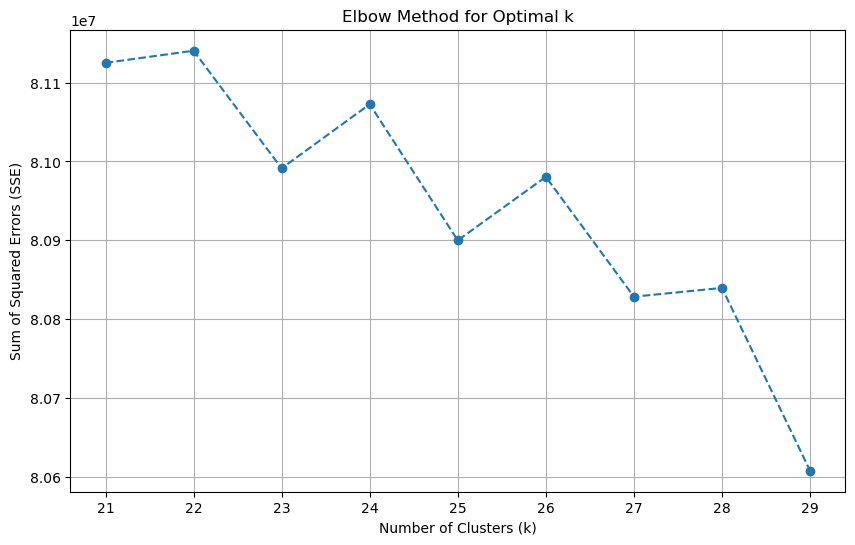

In [70]:
k_values = range(21, 30)
sse = []
for k in k_values:
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=random_seed)
    kmeans.fit(scaled_features)
    sse.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(k_values, sse, marker='o', linestyle='--')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Sum of Squared Errors (SSE)')
plt.title('Elbow Method for Optimal k')
plt.xticks(k_values)
plt.grid(True)
plt.show()

### Optimal K and Mapping Longevity & Sillage

In [72]:
optimal_k = 27
kmeans = KMeans(n_clusters=optimal_k, n_init=10, random_state=random_seed)
df['cluster'] = kmeans.fit_predict(scaled_features)

In [73]:
df

,brand,perfume,notes,longevity,sillage,gender,Age Group,Occasion,Season,cluster
0,18 21 Man Made,Sweet Tobacco Spirits,"citruses, saffron, tonka bean, vanilla, exotic...",eternal,strong,unisex,Under 20,Formal,Fall,22
1,40 Notes Perfume,Cashmere Musk,"sandalwood, cedar, white musk, cashmere wood",very weak,moderate,unisex,30-40,Formal,Fall,5
2,40 Notes Perfume,Exotic Ylang Ylang,"ylang-ylang, gardenia, musk",eternal,moderate,unisex,Under 20,Formal,Fall,22
3,40 Notes Perfume,Exquisite Amber,"labdanum, styrax, benzoin, vanilla, musk",eternal,strong,female,50+,Office,Winter,9
4,40 Notes Perfume,Oudwood Veil,"kephalis, agarwood (oud)",eternal,enormous,unisex,20-30,Formal,Fall,22
...,...,...,...,...,...,...,...,...,...,...
37921,Urban Rituelle,Lemongrass Blend,"lemongrass, myrtle, grapefruit, eucalyptus",very weak,intimate,male,20-30,Formal,Summer,5
37922,Urban Rituelle,Peach Blossom,"peach, honey, sweet pea, mimosa",very weak,intimate,female,Under 20,Formal,Spring,22
37923,Urban Rituelle,Pomegranate,"pomegranate, citruses, red berries",very weak,intimate,unisex,Under 20,Casual,Spring,22
37924,Urban Rituelle,Vanilla,"vanilla, caramel, milk",very weak,intimate,female,Under 20,General,Year-round,22


In [74]:
df.to_excel('perfume_database_cluster.xlsx', index=False)

### User Profile Prediction Test

In [115]:
def map_intensity(intensity):
    longevity_map = {
        "Light and subtle": "longevity_weak",
        "Moderate": "longevity_moderate",
        "Strong": "longevity_long lasting",
        "Very strong": "longevity_eternal"
    }
    
    sillage_map = {
        "Light and subtle": "sillage_intimate",
        "Moderate": "sillage_moderate",
        "Strong": "sillage_strong",
        "Very strong": "sillage_enormous"
    }

    return longevity_map.get(intensity, "Moderate"), sillage_map.get(intensity, "Moderate")

In [142]:
def create_user_profile(scent_pref, intensity, gender, age_group, occasion, season):
    user_notes = vectorizer.transform([scent_pref]).toarray()
    user_longevity, user_sillage = map_intensity(intensity)
    user_occasion = 'Occasion_' + occasion
    user_season = 'Season_' + season
    user_gender = 'gender_' + gender
    user_age_group = 'Age Group_' + age_group

    user_additional_features = pd.DataFrame(0, index=[0], columns=additional_features.columns)
    user_additional_features[user_longevity] = 1
    user_additional_features[user_sillage] = 1
    user_additional_features[user_gender] = 1
    user_additional_features[user_age_group] = 1
    user_additional_features[user_occasion] = 1
    user_additional_features[user_season] = 1
    

    user_features = np.concatenate([user_notes, user_additional_features], axis=1)
    
    user_features = scaler.transform(user_features)
    return user_features

In [145]:
user_input = create_user_profile("Floral", "Strong", "female", "20-30", "Casual", "Fall")
# Predict the cluster for the user
user_cluster = kmeans.predict(user_input)

# Recommend fragrances from the same cluster
recommended_fragrances = df[df['cluster'] == user_cluster[0]]

recommended_fragrances = recommended_fragrances[
    (recommended_fragrances['gender'] == 'female') | (recommended_fragrances['gender'] == 'unisex')
    & (recommended_fragrances['Season'] == 'Fall')
    & (recommended_fragrances['Occasion'] == 'Casual')
]

selected_columns = ['brand', 'perfume', 'notes', 'gender', 'Season', 'Occasion']

recommended_fragrances_info = recommended_fragrances[selected_columns]

print(recommended_fragrances_info)

                                brand               perfume  \
23                      A Lab on Fire          Rose Rebelle   
24                      A Lab on Fire  Rose Rebelle Respawn   
34           A Wing A Prayer Perfumes               Big Sur   
39           A Wing A Prayer Perfumes                  Napa   
47           A Wing A Prayer Perfumes          Morning Mist   
...                               ...                   ...   
37898  Teone Reinthal Natural Perfume       Tea Rose Mimosa   
37917                  Urban Rituelle             Caramella   
37922                  Urban Rituelle         Peach Blossom   
37924                  Urban Rituelle               Vanilla   
37925                  Urban Rituelle         Vanilla Blend   

                                                   notes  gender      Season  \
23                                           rose, cacao  female      Spring   
24      carnation, rose, musk, incense, cacao, ivy, mint  female      Spring   
34 

C:\Users\dvdng\miniconda3\envs\cs178\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


# Save the Model

In [146]:
import pickle

In [147]:
kmeans

KMeans(n_clusters=27, n_init=10, random_state=1234)

In [169]:
with open("bag_of_words.pkl", "wb") as f:
    pickle.dump(bag_of_words, f)

In [163]:
with open("fragrance_vectorizer.pkl", "wb") as f:
    pickle.dump(vectorizer, f)

In [148]:
with open("kmeans_model.pkl", "wb") as f:
    pickle.dump(kmeans_model, f)

## Load the Model to see if it works

In [149]:
with open("kmeans_model.pkl", "rb") as f:
    loaded_kmeans_model = pickle.load(f)

In [150]:
loaded_kmeans_model

KMeans(n_clusters=27, n_init=10, random_state=1234)

In [164]:
with open("fragrance_vectorizer.pkl", "rb") as f:
    loaded_vectorizer = pickle.load(f)

In [165]:
loaded_vectorizer

CountVectorizer(tokenizer=<function custom_tokenizer at 0x0000025952BF1E40>)

In [170]:
with open("bag_of_words.pkl", "rb") as f:
    loaded_bag_of_words = pickle.load(f)

In [172]:
loaded_bag_of_words

<37926x2145 sparse matrix of type '<class 'numpy.int64'>'
	with 305021 stored elements in Compressed Sparse Row format>